In [31]:
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/DataSets/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn import cluster,datasets,mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler, scale
from itertools import cycle,islice
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy

In [33]:
read_data = pd.read_csv('iris.csv')
read_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [34]:
dataSet = read_data
X = dataSet.drop(['species'], axis=1)

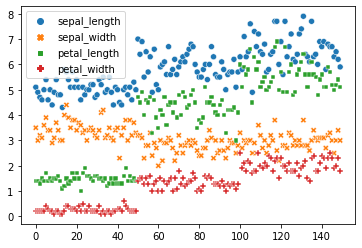

In [35]:
sns.scatterplot(data=X);

**Taking number of clusters = 2**

In [36]:
Kmean = KMeans(n_clusters=2)
y_kmeans = Kmean.fit_predict(X)
print(y_kmeans)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


In [37]:
cen = Kmean.cluster_centers_
cen

array([[6.30103093, 2.88659794, 4.95876289, 1.69587629],
       [5.00566038, 3.36037736, 1.56226415, 0.28867925]])

**Scatter plot between Petal length and Petal width**

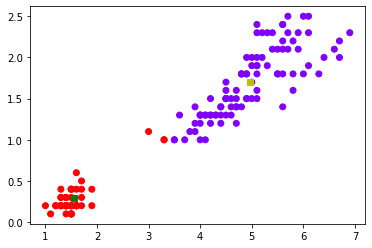

In [38]:
a1 = X['petal_length']
a2 = X['petal_width']
plt.scatter(a1, a2, c =y_kmeans, cmap='rainbow')
plt.scatter([1.56226415], [0.28867925],c='g',marker='s')
plt.scatter([4.95876289], [1.69587629],c='y',marker='s');

**Scatter plot between Sepal length and Sepal width**

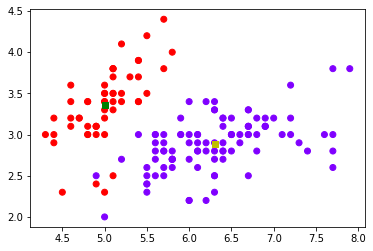

In [39]:
a1 = X['sepal_length']
a2 = X['sepal_width']
plt.scatter(a1, a2, c =y_kmeans, cmap='rainbow')
plt.scatter([5.00566038], [3.36037736],c='g',marker='s')
plt.scatter([6.30103093], [2.88659794],c='y',marker='s');

**Scatter plot between Petal length and Sepal length** 

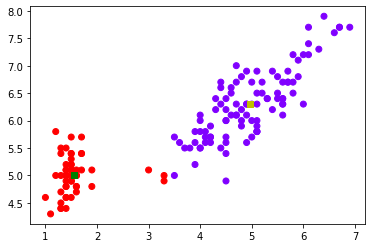

In [40]:
a1 = X['petal_length']
a2 = X['sepal_length']
plt.scatter(a1,a2, c=y_kmeans, cmap='rainbow')
plt.scatter([1.56226415],[5.00566038],c='g',marker='s')
plt.scatter([4.95876289],[6.30103093],c='y',marker='s');

**Scatter plot between Petal length and Sepal width**

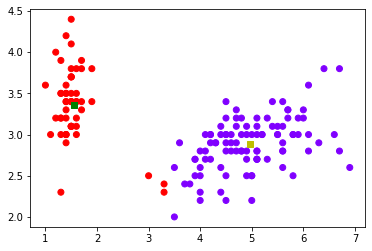

In [41]:
a1 = X['petal_length']
a2 = X['sepal_width']
plt.scatter(a1,a2,c=y_kmeans,cmap='rainbow')
plt.scatter([1.56226415],[3.36037736],c='g',marker='s')
plt.scatter([4.95876289],[2.88659794],c='y',marker='s');

**Scatter plot between Sepal length and petal width**

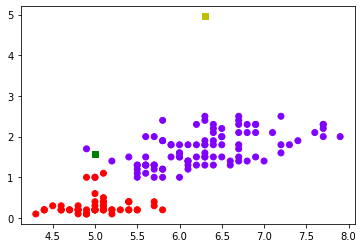

In [42]:
a1 = X['sepal_length']
a2 = X['petal_width']
plt.scatter(a1,a2,c=y_kmeans,cmap='rainbow')
plt.scatter([5.00566038],[1.56226415],c='g',marker='s')
plt.scatter([6.30103093],[4.95876289],c='y',marker='s')

**HTRU_2 Dataset**

In [43]:
read_data1 = pd.read_csv('HTRU_2.csv',header=None)
prePoc = False
X = read_data1.values[:,:-1]
Y = read_data1.values[:,-1]

In [44]:
Xscaled = scale(X)
Xscaled

array([[ 1.14931702,  1.33483164, -0.66956953, ..., -0.37062547,
        -0.07279778, -0.28743812],
       [-0.3341682 ,  1.80226533, -0.01178476, ..., -0.5889241 ,
         0.50442694,  0.21158145],
       [-0.31437216, -1.05332222, -0.14523256, ..., -0.23532816,
        -0.12599609, -0.39137346],
       ...,
       [ 0.3218423 ,  1.95621968, -0.2993338 , ...,  1.67156847,
        -1.28807874, -0.94133005],
       [ 0.13362759,  1.07450972, -0.26005007, ..., -0.66485697,
         0.37825656,  0.27584987],
       [-2.10576204,  5.73546965,  0.87267394, ...,  1.97154554,
        -2.19732744, -0.97105168]])

In [45]:
htru_2 = pd.DataFrame(Xscaled)
htru_2

,0,1,2,3,4,5,6,7
0,1.149317,1.334832,-0.669570,-0.400459,-0.319440,-0.370625,-0.072798,-0.287438
1,-0.334168,1.802265,-0.011785,-0.370535,-0.371102,-0.588924,0.504427,0.211581
2,-0.314372,-1.053322,-0.145233,-0.116593,-0.322107,-0.235328,-0.125996,-0.391373
3,1.000694,1.553254,-0.513409,-0.390178,-0.304404,-0.275666,-0.312265,-0.481300
4,-0.871402,-0.858879,0.115609,-0.104866,-0.388010,-0.763111,1.324026,1.386794
...,...,...,...,...,...,...,...,...
17893,0.988208,1.943284,-0.625655,-0.406697,-0.384010,-0.727295,1.586054,1.700034
17894,0.447319,0.429062,-0.328831,-0.234643,0.128776,0.939926,-1.189159,-0.906574
17895,0.321842,1.956220,-0.299334,-0.407492,0.299137,1.671568,-1.288079,-0.941330
17896,0.133628,1.074510,-0.260050,-0.291041,-0.361967,-0.664857,0.378257,0.275850


In [46]:
pca = PCA(n_components = 2)
reduce_data = pca.fit_transform(htru_2)
print(reduce_data[:10])

[[-1.27884879 -1.27313333]
 [-1.02055347 -0.20116189]
 [ 0.18828859  0.43211417]
 [-1.0154657  -1.46988105]
 [-0.82262618  2.12365118]
 [-0.45187742  0.78159081]
 [-2.8827219   2.28534697]
 [-1.4583598   1.00741239]
 [-0.67024275 -0.06025124]
 [ 0.30508499  0.29889765]]


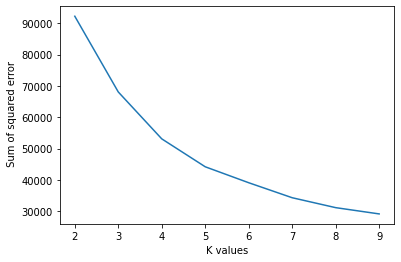

In [47]:
squ_sum_cri = []
k_range = range(2,10)
for k in k_range:
  km = KMeans(n_clusters=k)
  km.fit(htru_2)
  squ_sum_cri.append(km.inertia_)

plt.plot(k_range,squ_sum_cri)
plt.xlabel('K values')
plt.ylabel(' Sum of squared error');

**Taking K=2**

In [48]:
Kmean = KMeans(n_clusters=2)
clusters = Kmean.fit(reduce_data)
print(clusters)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [49]:
centroids = clusters.cluster_centers_
print(centroids)

[[-0.43841065 -0.10644893]
 [ 6.01444607  1.46034623]]


In [50]:
k_label = clusters.labels_
print(k_label)

[0 0 0 ... 0 0 0]


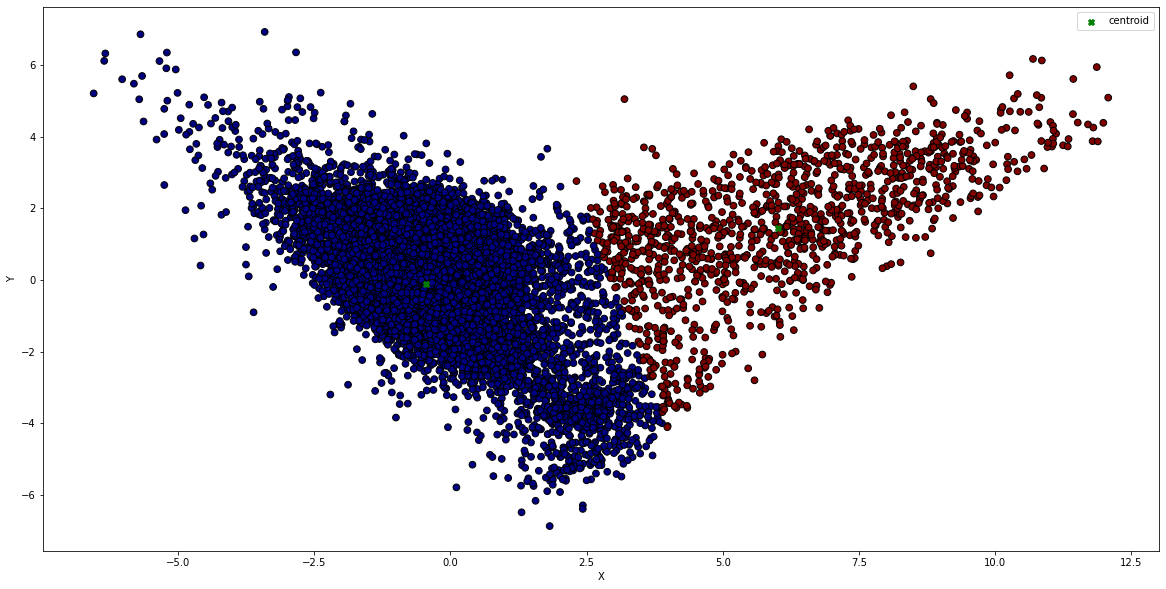

In [51]:
plt.figure(figsize=(20,10))
plt.scatter(reduce_data[:,0],reduce_data[:,1],c = k_label, cmap = 'jet', edgecolors ='k', s=45)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(centroids[:,0],centroids[:,1], marker = 'X', color = 'g', label = 'centroid')
plt.legend();

**Taking K=3**

In [52]:
Kmean = KMeans(n_clusters=3)
clusters = Kmean.fit_predict(reduce_data)
print(clusters)

[0 0 0 ... 1 0 1]


In [53]:
centroids = Kmean.cluster_centers_
print(centroids)

[[-0.71363732  0.24350499]
 [ 1.5307371  -2.24599755]
 [ 6.48663748  2.02718923]]


In [54]:
k_label = Kmean.labels_
print(k_label)

[0 0 0 ... 1 0 1]


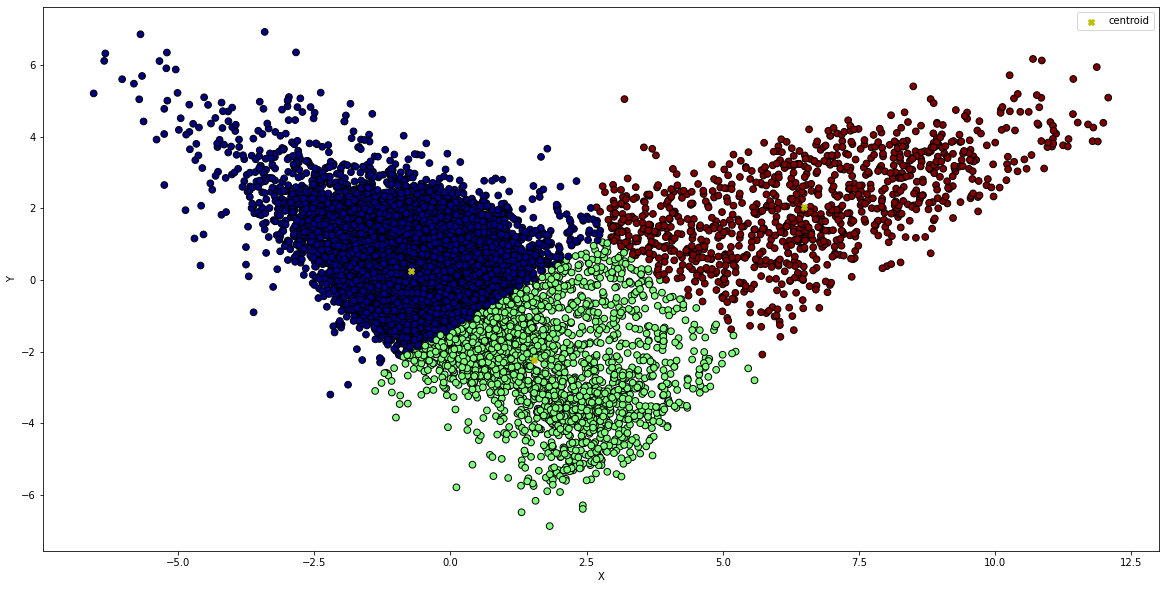

In [55]:
plt.figure(figsize=(20,10))
plt.scatter(reduce_data[:,0],reduce_data[:,1],c = k_label, cmap = 'jet', edgecolors ='k', s=45)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(centroids[:,0],centroids[:,1], marker = 'X', color = 'y', label = 'centroid')
plt.legend();

**Silhouette Score**

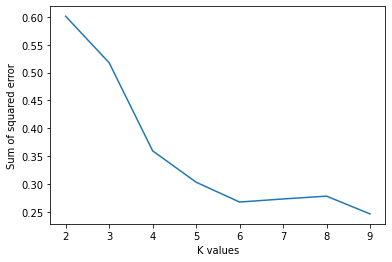

In [56]:
scores = []
for k in k_range:
  km = KMeans(n_clusters=k)
  pre = km.fit_predict(Xscaled)
  s = silhouette_score(Xscaled,pre)
  scores.append(s)
plt.plot(k_range,scores)
plt.xlabel("K values")
plt.ylabel("Sum of squared error");

In [57]:
for k in k_range:
  km = KMeans(n_clusters=k)
  pre = km.fit_predict(Xscaled)
  s = silhouette_score(Xscaled,pre)
  print(f" For the value of k={k} the silhouette score is :{s}")

 For the value of k=2 the silhouette score is :0.6011060556631193
 For the value of k=3 the silhouette score is :0.5176256410724899
 For the value of k=4 the silhouette score is :0.3577857053636131
 For the value of k=5 the silhouette score is :0.3033729985691966
 For the value of k=6 the silhouette score is :0.2677140231056948
 For the value of k=7 the silhouette score is :0.2743730353714954
 For the value of k=8 the silhouette score is :0.27607683442787023
 For the value of k=9 the silhouette score is :0.2468372182506164


**Toy dataset**

In [58]:
np.random.seed(0)
n_samples = 1600
dataset1,label1 = datasets.make_circles(n_samples=n_samples, factor=.5, noise=.05)
dataset2,label2 = datasets.make_moons(n_samples=n_samples, noise=.05)
dataset3,label3 = datasets.make_blobs(n_samples=n_samples, centers=4, cluster_std=0.60, random_state=0)
dataset4,label4 = np.random.rand(n_samples, 2),None

In [59]:
d = [dataset1,dataset2,dataset3,dataset4]
for i in d:
   prep = StandardScaler().fit_transform(i)
   print(f"*******DataSet *******")
   for k in k_range:
     kmeans = cluster.KMeans(n_clusters=k)
     clusters = kmeans.fit(prep)
     centroids = clusters.cluster_centers_
     l = clusters.labels_
     plt.scatter(prep[:,0],prep[:,1], c=l, cmap='jet', edgecolors='k',s=50)
     plt.xlabel("X")
     plt.ylabel("Y")
     plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Average Linkage**

In [60]:
hierar_avg = AgglomerativeClustering(n_clusters=3, linkage='average')

In [61]:
hierar_clus = hierar_avg.fit(reduce_data)
hierar_avg_labels = hierar_clus.labels_
hierar_avg_labels

array([0, 0, 0, ..., 0, 0, 0])

**Min Linkage**

In [62]:
hierar_min = AgglomerativeClustering(n_clusters = 3, linkage = 'single')

In [63]:
hierar_clus = hierar_min.fit(reduce_data)
hierar_min_labels = hierar_clus.labels_
hierar_min_labels

array([0, 0, 0, ..., 0, 0, 0])

**Max Linkage**

In [64]:
hierar_max = AgglomerativeClustering(n_clusters = 3, linkage = 'complete')

In [65]:
hierar_clus = hierar_max.fit(reduce_data)
hierar_max_labels = hierar_clus.labels_
hierar_max_labels

array([0, 2, 0, ..., 0, 2, 0])

No handles with labels found to put in legend.


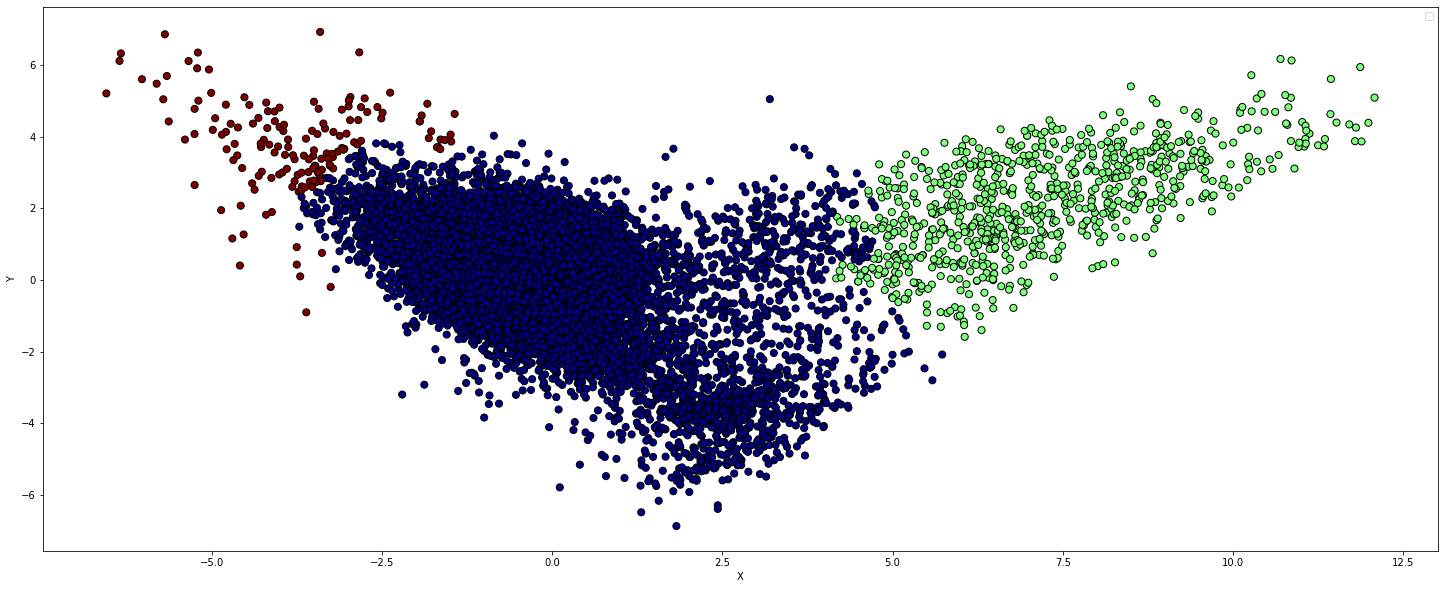

In [66]:
plt.figure(figsize=(25,10))
plt.scatter(reduce_data[:,0],reduce_data[:,1], c = hierar_avg_labels, cmap = 'jet', edgecolors='k', s = 50)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend();

No handles with labels found to put in legend.


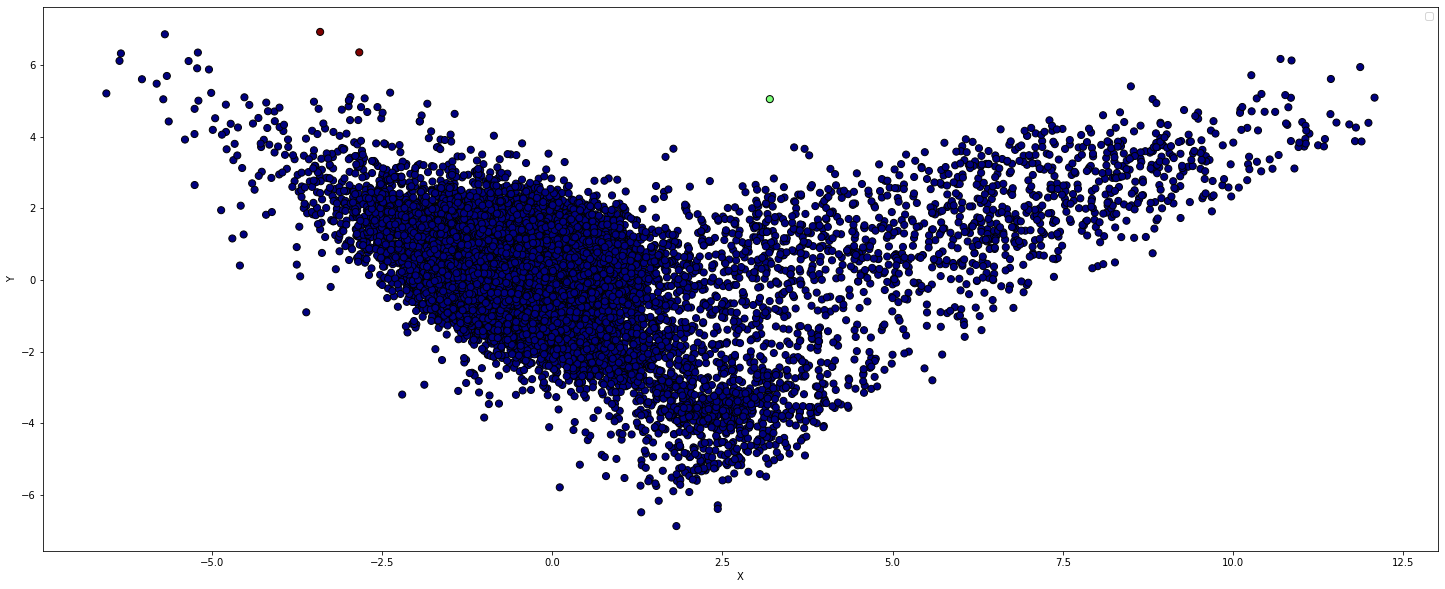

In [67]:
plt.figure(figsize=(25,10))
plt.scatter(reduce_data[:,0],reduce_data[:,1], c = hierar_min_labels, cmap = 'jet', edgecolors='k', s = 50)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend();

No handles with labels found to put in legend.


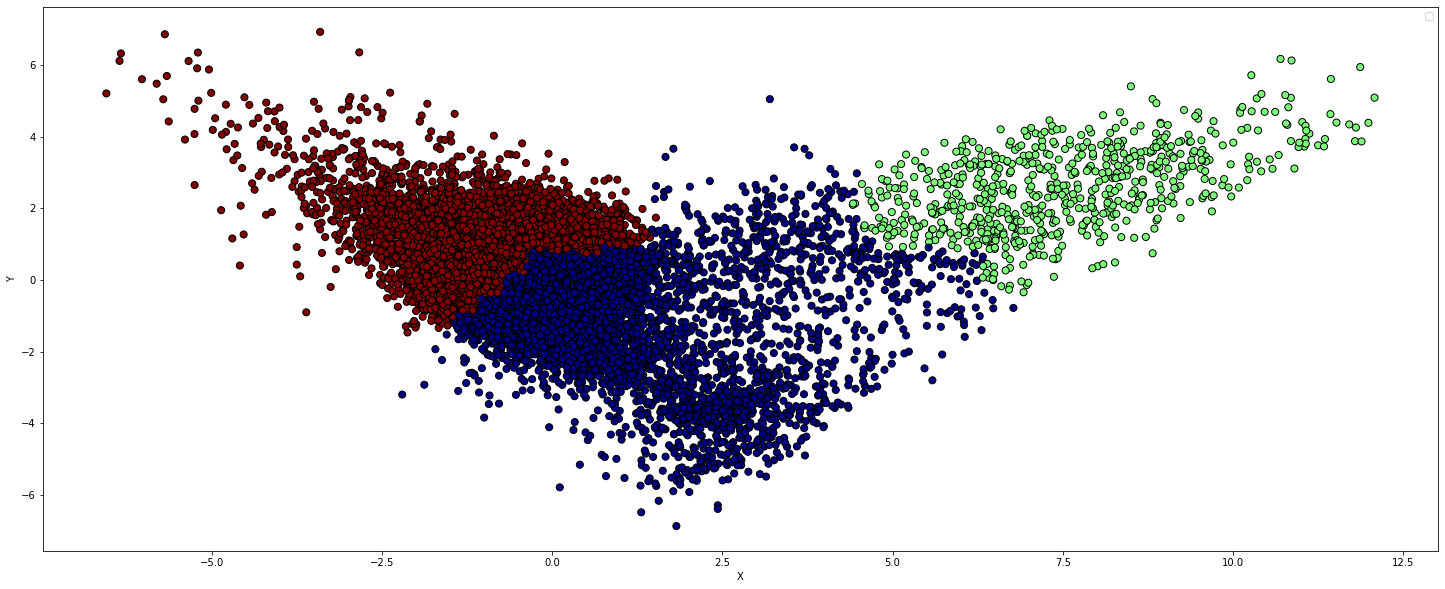

In [68]:
plt.figure(figsize=(25,10))
plt.scatter(reduce_data[:,0],reduce_data[:,1], c = hierar_max_labels, cmap = 'jet', edgecolors='k', s = 50)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend();

**Agglomerative Clustering with linkage Average**

In [69]:
for i in d:
   prep = StandardScaler().fit_transform(i)
   print(f"*******DataSet *******")
   for k in k_range:
     hierar = AgglomerativeClustering(n_clusters=3, linkage='average')
     hierar_clus = hierar.fit(prep)
     hierar_labels = hierar_clus.labels_
     plt.scatter(prep[:,0],prep[:,1], c=hierar_labels, cmap='jet', edgecolors='k',s=50)
     plt.xlabel("X")
     plt.ylabel("Y")
     plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Agglomerative Clustering with linkage Minimum**

In [70]:
for i in d:
   prep = StandardScaler().fit_transform(i)
   print(f"*******DataSet *******")
   for k in k_range:
     hierar = AgglomerativeClustering(n_clusters=3, linkage='single')
     hierar_clus = hierar.fit(prep)
     hierar_labels = hierar_clus.labels_
     plt.scatter(prep[:,0],prep[:,1], c=hierar_labels, cmap='jet', edgecolors='k',s=50)
     plt.xlabel("X")
     plt.ylabel("Y")
     plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Agglomerative Clustering with linkage Maximum**

In [71]:
for i in d:
   prep = StandardScaler().fit_transform(i)
   print(f"*******DataSet *******")
   for k in k_range:
     hierar = AgglomerativeClustering(n_clusters=3, linkage='complete')
     hierar_clus = hierar.fit(prep)
     hierar_labels = hierar_clus.labels_
     plt.scatter(prep[:,0],prep[:,1], c=hierar_labels, cmap='jet', edgecolors='k',s=50)
     plt.xlabel("X")
     plt.ylabel("Y")
     plt.show()

Output hidden; open in https://colab.research.google.com to view.

**Proximity Matrix**

In [72]:
dist_matrix = distance_matrix(reduce_data,reduce_data)
dist_matrix

array([[0.        , 1.102651  , 2.24952465, ..., 2.41680575, 1.16977956,
        6.17219155],
       [1.102651  , 0.        , 1.36467494, ..., 3.01220671, 0.11880638,
        6.67213286],
       [2.24952465, 1.36467494, 0.        , ..., 3.15710065, 1.40384121,
        6.39474942],
       ...,
       [2.41680575, 3.01220671, 3.15710065, ..., 0.        , 3.12922557,
        3.75542434],
       [1.16977956, 0.11880638, 1.40384121, ..., 3.12922557, 0.        ,
        6.79093227],
       [6.17219155, 6.67213286, 6.39474942, ..., 3.75542434, 6.79093227,
        0.        ]])

In [73]:
# li = hierarchy.linkage(dist_matrix, 'average');

In [74]:
# den = hierarchy.dendrogram(li) 

**DBScan Clustering**

In [75]:
db = DBSCAN(eps=1.0,min_samples=4)
DBSCANClust = db.fit(reduce_data)
new_labels = DBSCANClust.labels_

In [77]:
for i in d:
   prep = StandardScaler().fit_transform(i)
   print(f"*******DataSet *******")
   for k in k_range:
     dbscan = DBSCAN(eps=1.0,min_samples=4)
     db_clust = db.fit(prep)
     db_labels = db_clust.labels_
     plt.scatter(prep[:,0],prep[:,1], c=db_labels, cmap='jet', edgecolors='k',s=50)
     plt.xlabel("X")
     plt.ylabel("Y")
     plt.title("DBSCAN")
     plt.show()

Output hidden; open in https://colab.research.google.com to view.